#  Import Library

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from collections import defaultdict
from textwrap import wrap
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text
from sklearn.feature_extraction.text import TfidfVectorizer

import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from bs4 import BeautifulSoup
import google.generativeai as genai

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Misc.
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\fachr\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\fachr\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\fachr\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# Preprocessing

## Import Data

### DKI Jakarta

In [2]:
dki_paths = [
    #r'.\dataset\DKI Jakarta\Jakarta_reviews.csv',
    r'.\dataset\DKI Jakarta\Revisi Jakarta 1\Jakarta_reviews_rev1.csv',
    r'.\dataset\DKI Jakarta\Revisi Jakarta 2\Jakarta_reviews_rev2.csv',
    r'.\dataset\DKI Jakarta\Revisi Jakarta 3\Jakarta_reviews_rev3.csv'
]

In [3]:
dki_dfs = [pd.read_csv(dki_path) for dki_path in dki_paths]
dki_xlsx = pd.read_excel('.\dataset\DKI Jakarta\Jakarta_reviews.xlsx')

### Banten

In [4]:
banten_paths = [
    r'.\dataset\Banten\Banten_reviews.csv',
    r'.\dataset\Banten\Revisi Banten 1\Banten_reviews_rev1.csv',
    r'.\dataset\Banten\Revisi Banten 2\Banten_reviews_rev2.csv',
    r'.\dataset\Banten\Revisi Banten 3\Banten_reviews_rev3.csv',
    r'.\dataset\Banten\Revisi Banten 4\Banten_reviews_rev4.csv',
    r'.\dataset\Banten\Revisi Banten 5\Banten_reviews_rev5.csv'
]

In [5]:
banten_dfs = [pd.read_csv(banten_path) for banten_path in banten_paths]

### Jawa Barat

In [6]:
jabar_paths = [
    r'.\dataset\Jawa Barat\Jabar_reviews.csv',
    r'.\dataset\Jawa Barat\Revisi Jawa Barat 1\Jabar_reviews_rev1.csv',
    r'.\dataset\Jawa Barat\Revisi Jawa Barat 2\Jabar_reviews_rev2.csv',
    r'.\dataset\Jawa Barat\Revisi Jawa Barat 3\Jabar_reviews_rev3.csv',
    r'.\dataset\Jawa Barat\Revisi Jawa Barat 4\Jabar_reviews_rev4.csv'
]

In [7]:
jabar_dfs = [pd.read_csv(jabar_path) for jabar_path in jabar_paths]

### Jawa Tengah

In [8]:
jateng_paths = [
    #r'.\dataset\DKI Jakarta\Jakarta_reviews.csv',
    r'.\dataset\Jawa Tengah\Revisi Jawa Tengah 1\jateng_reviews_rev1.csv',
    r'.\dataset\Jawa Tengah\Revisi Jawa Tengah 2\jateng_reviews_rev2.csv',
    r'.\dataset\Jawa Tengah\Revisi Jawa Tengah 3\jateng_reviews_rev3.csv'
]

In [9]:
jateng_dfs = [pd.read_csv(jateng_path) for jateng_path in jateng_paths]
jateng_xlsx = pd.read_excel('.\dataset\Jawa Tengah\Jateng_reviews.xlsx')

### Jawa Timur

In [10]:
jatim_paths = [
    r'.\dataset\Jawa Timur\jatim_reviews.csv',
    r'.\dataset\Jawa Timur\Revisi Jawa Timur 1\jatim_reviews_rev1.csv',
    r'.\dataset\Jawa Timur\Revisi Jawa Timur 2\jatim_reviews_rev2.csv',
    r'.\dataset\Jawa Timur\Revisi Jawa Timur 3\jatim_reviews_rev3.csv'
]

In [11]:
jatim_dfs = [pd.read_csv(jatim_path) for jatim_path in jatim_paths]

### DI Yogyakarta

In [12]:
diy_paths = [
    r'.\dataset\DIY\DIY_reviews.csv',
    r'.\dataset\DIY\Revisi DIY 1\DIY_reviews_rev1.csv',
    r'.\dataset\DIY\Revisi DIY 2\DIY_reviews_rev2.csv',
    r'.\dataset\DIY\Revisi DIY 3\DIY_reviews_rev3.csv'
]

In [13]:
diy_dfs = [pd.read_csv(diy_path) for diy_path in diy_paths]

## Concat

In [14]:
merged_dki = pd.concat([pd.concat(dki_dfs, ignore_index=True), dki_xlsx], ignore_index=True)
merged_banten = pd.concat(banten_dfs, ignore_index=True)
merged_jabar = pd.concat(jabar_dfs, ignore_index=True)
merged_jateng = pd.concat([pd.concat(jateng_dfs, ignore_index=True), jateng_xlsx], ignore_index=True)
merged_jatim = pd.concat(jatim_dfs, ignore_index=True)
merged_diy = pd.concat(diy_dfs, ignore_index=True)

## Drop Feature

In [15]:
merged_dki.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115739 entries, 0 to 115738
Data columns (total 16 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   place_id                             115739 non-null  object 
 1   place_name                           115739 non-null  object 
 2   review_id_hash                       115739 non-null  object 
 3   rating                               115739 non-null  int64  
 4   review_text                          60112 non-null   object 
 5   published_at                         115739 non-null  object 
 6   published_at_date                    115739 non-null  object 
 7   response_from_owner_text             13697 non-null   object 
 8   response_from_owner_ago              13975 non-null   object 
 9   response_from_owner_date             13974 non-null   object 
 10  review_likes_count                   115739 non-null  int64  
 11  total_number_

In [16]:
selected_col = ['place_id', 'review_id_hash', 'rating', 'published_at_date',
                'review_text', 'review_translated_text'
                ]

In [17]:
clean_df_dki = merged_dki[selected_col]
clean_df_banten = merged_banten[selected_col]
clean_df_jabar = merged_jabar[selected_col]
clean_df_jateng = merged_jateng[selected_col]
clean_df_jatim = merged_jatim[selected_col]
clean_df_diy = merged_diy[selected_col]

## Combine All

In [18]:
full_df = pd.concat([clean_df_dki, clean_df_banten, clean_df_jabar, clean_df_jateng, clean_df_jatim, clean_df_diy], ignore_index=True)
full_df = full_df.drop_duplicates(subset='review_id_hash', ignore_index=True)
full_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 467467 entries, 0 to 467466
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   place_id                467467 non-null  object
 1   review_id_hash          467467 non-null  object
 2   rating                  467467 non-null  int64 
 3   published_at_date       467467 non-null  object
 4   review_text             243076 non-null  object
 5   review_translated_text  193762 non-null  object
dtypes: int64(1), object(5)
memory usage: 21.4+ MB


## Feature Engineering

### date filter 

In [19]:
# Ubah kolom published_at_date menjadi format datetime
full_df['published_at_date'] = pd.to_datetime(full_df['published_at_date']).dt.date

# Filter untuk 5 tahun terakhir
end_date = pd.to_datetime('now').date()
start_date = end_date.replace(year=end_date.year - 5)

full_df = full_df[(full_df['published_at_date'] >= start_date) & (full_df['published_at_date'] <= end_date)]

In [20]:
full_df

,place_id,review_id_hash,rating,published_at_date,review_text,review_translated_text
0,ChIJd0EvQ4_zaS4ROHLtujX-hmE,24fa52235699580db1e3d25d426d3ee2,5,2024-05-13,NaN,NaN
1,ChIJd0EvQ4_zaS4ROHLtujX-hmE,0bd28397af73892f7f2442f631a3413d,5,2024-05-12,Bring it on,Ajieb
2,ChIJd0EvQ4_zaS4ROHLtujX-hmE,b03f9e10a0f752ea9e2cf745f99eec2f,5,2024-05-12,NaN,NaN
3,ChIJd0EvQ4_zaS4ROHLtujX-hmE,65aa47e2c0496e735239c1b2124da78e,4,2024-05-12,Bnyk varian menu,Many menu variants
4,ChIJd0EvQ4_zaS4ROHLtujX-hmE,4b9862cce476d92e08a5d9f28b043a4d,1,2024-05-12,Not open or has it disbanded? But the restaura...,NaN
...,...,...,...,...,...,...
467462,ChIJrYIz0CJXei4R-NAdJzRuNeE,a332d84cb4c015471476b302fca0c0ac,5,2023-05-14,Rasanya enak,It feels good
467463,ChIJEeRcDTFZei4RGwM0XiFELDo,5b63313e61c9e5d97b8c26af6e777634,5,2023-12-14,NaN,NaN
467464,ChIJQ3jEZgBZei4RJq00TKSIV7w,8d28e90adb3a0e4714898944b105ac39,5,2024-04-14,NaN,NaN
467465,ChIJi2wQirFZei4RsHLHfUxpZ_k,0546bd30d3bf441d27d7d830ccfe1cee,5,2020-05-14,NaN,NaN


### Add indonesian_text and english_text

In [21]:
# Inisialisasi kolom baru dengan dtype yang sesuai
full_df['english_review'] = np.nan
full_df['indonesian_review'] = np.nan

# Memisahkan ulasan berdasarkan bahasa menggunakan operasi vectorized
mask_both_notnull = full_df['review_text'].notnull() & full_df['review_translated_text'].notnull()
mask_translated_null = full_df['review_translated_text'].isnull()

full_df.loc[mask_both_notnull, 'english_review'] = full_df['review_translated_text']
full_df.loc[mask_both_notnull, 'indonesian_review'] = full_df['review_text']
full_df.loc[mask_translated_null, 'english_review'] = full_df['review_text']

# Menghapus kolom asli
full_df.drop(['review_text', 'review_translated_text'], axis=1, inplace=True)

In [22]:
full_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 438904 entries, 0 to 467466
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   place_id           438904 non-null  object
 1   review_id_hash     438904 non-null  object
 2   rating             438904 non-null  int64 
 3   published_at_date  438904 non-null  object
 4   english_review     228676 non-null  object
 5   indonesian_review  181996 non-null  object
dtypes: int64(1), object(5)
memory usage: 39.6+ MB


### Add Label

In [23]:
def determine_sentiment(rating):
    if rating < 4:
        return 0  # Negatif
    else:
        return 1  # Positif

# Menambahkan kolom sentiment berdasarkan rating
full_df['sentiment'] = full_df['rating'].apply(determine_sentiment)

In [24]:
full_df

,place_id,review_id_hash,rating,published_at_date,english_review,indonesian_review,sentiment
0,ChIJd0EvQ4_zaS4ROHLtujX-hmE,24fa52235699580db1e3d25d426d3ee2,5,2024-05-13,NaN,NaN,1
1,ChIJd0EvQ4_zaS4ROHLtujX-hmE,0bd28397af73892f7f2442f631a3413d,5,2024-05-12,Ajieb,Bring it on,1
2,ChIJd0EvQ4_zaS4ROHLtujX-hmE,b03f9e10a0f752ea9e2cf745f99eec2f,5,2024-05-12,NaN,NaN,1
3,ChIJd0EvQ4_zaS4ROHLtujX-hmE,65aa47e2c0496e735239c1b2124da78e,4,2024-05-12,Many menu variants,Bnyk varian menu,1
4,ChIJd0EvQ4_zaS4ROHLtujX-hmE,4b9862cce476d92e08a5d9f28b043a4d,1,2024-05-12,Not open or has it disbanded? But the restaura...,NaN,0
...,...,...,...,...,...,...,...
467462,ChIJrYIz0CJXei4R-NAdJzRuNeE,a332d84cb4c015471476b302fca0c0ac,5,2023-05-14,It feels good,Rasanya enak,1
467463,ChIJEeRcDTFZei4RGwM0XiFELDo,5b63313e61c9e5d97b8c26af6e777634,5,2023-12-14,NaN,NaN,1
467464,ChIJQ3jEZgBZei4RJq00TKSIV7w,8d28e90adb3a0e4714898944b105ac39,5,2024-04-14,NaN,NaN,1
467465,ChIJi2wQirFZei4RsHLHfUxpZ_k,0546bd30d3bf441d27d7d830ccfe1cee,5,2020-05-14,NaN,NaN,1


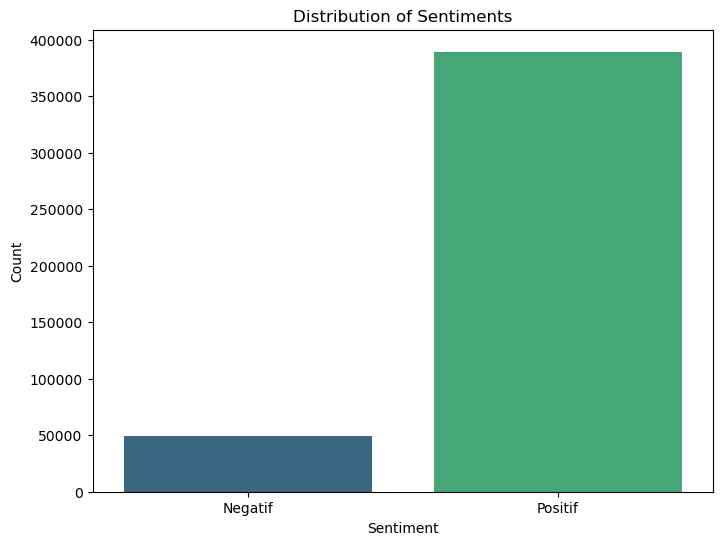

In [25]:
# Menghitung distribusi sentimen
sentiment_counts = full_df['sentiment'].value_counts()

# Membuat bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Distribution of Sentiments')
plt.xticks(ticks=[0, 1], labels=['Negatif', 'Positif'])
plt.show()

In [26]:
indo_df    = full_df.drop('english_review', axis=1).dropna(subset=['indonesian_review'])
english_df = full_df.drop('indonesian_review', axis=1).dropna(subset=['english_review'])

In [27]:
english_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 228676 entries, 1 to 467462
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   place_id           228676 non-null  object
 1   review_id_hash     228676 non-null  object
 2   rating             228676 non-null  int64 
 3   published_at_date  228676 non-null  object
 4   english_review     228676 non-null  object
 5   sentiment          228676 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 12.2+ MB


In [28]:
# Export for Labelling

# Pisahkan DataFrame berdasarkan kelas
df_positive = english_df[english_df['sentiment'] == 1]
df_negative = english_df[english_df['sentiment'] == 0]

# Tentukan ukuran sampel yang diinginkan (undersampling)
n_samples = 5000

# Ambil sampel dari setiap kelas
df_positive_sampled = df_positive.sample(n_samples, random_state=2024)
df_negative_sampled = df_negative.sample(n_samples, random_state=2024)

df_positive_sampled.to_csv('.\sentiment_dataset\df_positive.csv')
df_negative_sampled.to_csv('.\sentiment_dataset\df_negative.csv')

# Critism Dataset

## Import Data

In [29]:
critism_paths = [
    r'.\sentiment_dataset\df_neg_1.csv',
    r'.\sentiment_dataset\df_neg_2.csv',
    r'.\sentiment_dataset\df_neg_3.csv',
    r'.\sentiment_dataset\df_neg_4.csv',
    r'.\sentiment_dataset\df_neg_5.csv',
    r'.\sentiment_dataset\df_pos_1.csv',
    r'.\sentiment_dataset\df_pos_2.csv',
    r'.\sentiment_dataset\df_pos_3.csv',
    r'.\sentiment_dataset\df_pos_4.csv',
    r'.\sentiment_dataset\df_pos_5.csv',
    r'.\sentiment_dataset\df_pos_6.csv'
]

In [30]:
critism_dfs = [pd.read_csv(critism_path) for critism_path in critism_paths]

## Combine Data

In [31]:
merged_critism = pd.concat(critism_dfs, ignore_index=True)

## Feature Engineering

In [32]:
critism_df = merged_critism.dropna(subset=['label'])
critism_df['label'] = critism_df['label'].astype(int)

In [33]:
critism_df[critism_df['label'] == 0].count()

place_id             4352
review_id_hash       4352
rating               4352
published_at_date    4352
english_review       4352
sentiment            4352
label                4352
dtype: int64

# Sentiment Analysis (English)

## Prepare and split data

In [34]:
def review_to_words(raw_review):
    # 1. Remove HTML
    review_text = BeautifulSoup(raw_review, 'lxml').get_text() 
    
    # 2. Tokenize words
    words = word_tokenize(review_text)
    
    # 3. Convert to lower case
    words = [word.lower() for word in words]
    
    # 4. Remove non-alphabetic characters and numbers
    words = [re.sub("[^a-zA-Z]", "", word) for word in words]
    
    # 5. Lemmatization
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]
    
    # 6. Create set of stopwords
    stops = set(stopwords.words("english"))
    
    # 7. Remove stop words
    meaningful_words = [word for word in words if word not in stops]
    
    # 8. Join the words back into one string separated by space
    return " ".join(meaningful_words)




In [35]:
# Contoh penggunaan
df_balanced = critism_df.copy()
df_balanced['english_review'] = df_balanced['english_review'].apply(review_to_words)


In [36]:
X = df_balanced['english_review']
y = df_balanced['label']

# Split data menjadi train dan sementara untuk validation+test (20% dari data)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, stratify=y, random_state=2024)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=2024)


## Modelling

In [37]:
# Load model BERT
tfhub_handle_preprocess = "https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3"
tfhub_handle_encoder = "https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-128_A-2/2"

In [38]:
def build_classifier_model():
    text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
    preprocessing_layer = hub.KerasLayer(tfhub_handle_preprocess, name='preprocessing')
    encoder_inputs = preprocessing_layer(text_input)
    encoder = hub.KerasLayer(tfhub_handle_encoder, trainable=True, name='BERT_encoder')
    outputs = encoder(encoder_inputs)
    net = outputs['pooled_output']
    net = tf.keras.layers.Dropout(0.2)(net)
    net = tf.keras.layers.Dense(1, activation='sigmoid', name='classifier')(net)  # Sigmoid untuk binary classification
    return tf.keras.Model(text_input, net)

In [39]:
# Compile model
classifier_model = build_classifier_model()
classifier_model.compile(optimizer='adam',
                         loss='binary_crossentropy',
                         metrics=['accuracy'])

In [40]:
# Define callback for saving the best model based on validation loss
checkpoint_filepath = 'critique_model.h5'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=False,
    monitor='val_loss',
    mode='min',
    save_best_only=True)

In [41]:
# Training
history = classifier_model.fit(X_train, y_train,
                               validation_data=(X_val, y_val),
                               epochs=5,
                               batch_size=32,
                               callbacks=[model_checkpoint_callback])

Epoch 1/5
249/249 [==============================] - 53s 199ms/step - loss: 0.4828 - accuracy: 0.7713 - val_loss: 0.4031 - val_accuracy: 0.8300
Epoch 2/5
249/249 [==============================] - 33s 132ms/step - loss: 0.3806 - accuracy: 0.8415 - val_loss: 0.4159 - val_accuracy: 0.8159
Epoch 3/5
249/249 [==============================] - 29s 116ms/step - loss: 0.3421 - accuracy: 0.8670 - val_loss: 0.4256 - val_accuracy: 0.8300
Epoch 4/5
249/249 [==============================] - 29s 116ms/step - loss: 0.3051 - accuracy: 0.8830 - val_loss: 0.4805 - val_accuracy: 0.8249
Epoch 5/5
249/249 [==============================] - 29s 116ms/step - loss: 0.3030 - accuracy: 0.8843 - val_loss: 0.4545 - val_accuracy: 0.8139


In [42]:
# Save model in .h5 format
classifier_model =  tf.keras.models.load_model('critique_model.h5', custom_objects={'KerasLayer': hub.KerasLayer})

## Evaluation

In [43]:
# Evaluasi pada data test
loss, accuracy = classifier_model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')

32/32 [==============================] - 3s 84ms/step - loss: 0.4182 - accuracy: 0.8201
Test Loss: 0.4181698262691498
Test Accuracy: 0.8201004862785339


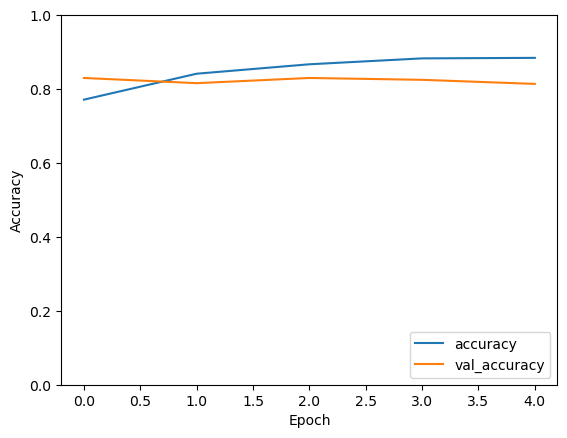

In [44]:
# Plot history
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

In [45]:
# Confusion Matrix
y_pred_probs = classifier_model.predict(X_test)
y_pred = np.round(y_pred_probs).astype(int)
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

# Classification Report
print(classification_report(y_test, y_pred))


32/32 [==============================] - 4s 99ms/step
[[390  45]
 [134 426]]
              precision    recall  f1-score   support

           0       0.74      0.90      0.81       435
           1       0.90      0.76      0.83       560

    accuracy                           0.82       995
   macro avg       0.82      0.83      0.82       995
weighted avg       0.83      0.82      0.82       995



## Prediction

In [46]:
# Prediksi satu kalimat review
def predict_review(review):
    preprocessed_review = review_to_words(review)
    probabilities = classifier_model.predict([preprocessed_review])[0][0]
    return probabilities

review = "the waiter very bad"
probability = predict_review(review)
print(f'Probability of positive sentiment: {probability}')

# Menggunakan probabilitas untuk klasifikasi
threshold = 0.5
predicted_sentiment = "critique/suggestion" if probability > threshold else "not critique/suggestion"
print(f'Predicted sentiment: {predicted_sentiment}')

1/1 [==============================] - 0s 412ms/step
Probability of positive sentiment: 0.8236640095710754
Predicted sentiment: critique/suggestion


In [47]:
# # Fungsi prediksi satu kalimat review
# def predict_review(review, classifier_model):
#     preprocessed_review = review_to_words(review)
#     probabilities = classifier_model.predict([preprocessed_review])[0][0]
#     return probabilities

# # Fungsi gabungan untuk menambahkan kolom 'pred_probab'
# def add_probability_column(df, classifier_model):
#     df['pred_probab'] = df['english_review'].apply(lambda review: predict_review(review, classifier_model))
#     return df

# # Misal classifier_model sudah dilatih
# temp_df = english_df.sample(1000, random_state=2024)

# temp_df = add_probability_column(temp_df, classifier_model)

# # Tampilkan dataframe dengan kolom baru 'pred_probab'
# temp_df.head(10)
